In [1]:
# # Only run this cell if you're using Google Colab

# !git clone https://github.com/torresmateo/fgv-class-2022.git

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import math

# Part 1 -- Implement a simple 2-layer network (forward)

Here, you implement a simple 2-layer perceptron (forward propagation)

First, generate 1000 datapoints using the function $y(\vec{x}) = 3 \sin (2 \pi x_1) + 4 \cos (2 \pi x_2)$, 
and plot the data.

Plot the surface

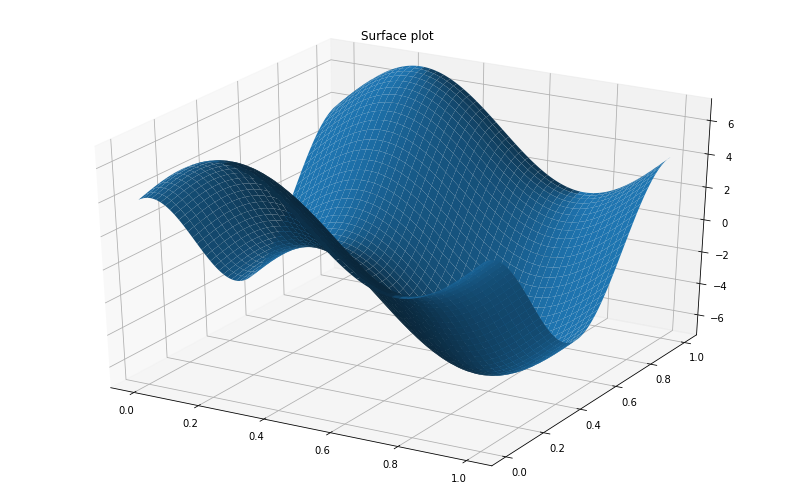

In [24]:
x1 = np.linspace(0,1,1000)
x2 = np.linspace(0,1,1000)
X, Y = np.meshgrid(x1, x2)
z = 3*np.sin(2*np.pi*X) + 4*np.cos(2*np.pi*Y)
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
Z = np.reshape(z, X.shape)
surf = ax.plot_surface(X,Y,Z)
ax.set_title('Surface plot')

plt.show()

Implement the sigmoid function

In [37]:
def sigmoid(x):
  y = 1/(1+np.exp(-x))
  return y

In [40]:
x = np.linspace(0,1,10)
y = sigmoid(x)
print(y)

[0.5        0.52774924 0.55532806 0.58257021 0.60931754 0.63542356
 0.66075637 0.68520098 0.70866083 0.73105858]


Implement `two_layer_perceptron`:

In [ ]:
def two_layer_perceptron(activation, dim_input, dim_hidden, dim_output, random_number_generator=0):
    """
    Implements the forward pass of a two-layer fully connected perceptron.
    
    Parameters
    ----------
    activation : function
        the activation function to be used for the hidden layer and the output layer
    dim_input : int
        the dimensionality of the input layer
    dim_hidden : int
        the dimensionality of the hidden layer
    dim_output : int
        the dimensionality of the output layer
    random_number_generator : a numpy random generator or int. Defaults to 0
        this will be used as the generator to initialize the weights of the perceptron.
        If an int is provided, a numpy random number generator will be generating using the
        integer as the seed.
    Returns
    -------
    a function with randomly initialized weight matrices that:
    * add a bias term to the input data
    * add a bias term to the hidden layer
    * outputs the value of the multilayer perceptron for a given ndarray of datapoints
    
    Notes
    -----
    Weights are initialized using a Gaussian distribution with mean 0 and std 0.001
    """
    # your code here
                      
    def return_function(x):
        """
        2-layer perceptron
        
        Parameters
        ----------
        x : 2-dimensional array
        
        Returns
        -------
        ndarray:
            The output of the 2-layer model
        """
        # your code here
    
    return return_function
    

In [ ]:
model = two_layer_perceptron(None, None, None, None)
X = # The generated datapoints
y_pred = model(X)

In [ ]:
# your code here
print(f"The mean squared error of the untrained model is: {mse:.3f}")

The mean squared error of the untrained model is: 12.749


# Part 2 -- Computation Graphs 

Many deep learning libraries provide several functions that you can use and compose to calculate something, and then feed data to the composed function to learn the values of the parameters that minimize a certain objective function.

Normally, we only need to care about the "forward pass" (this is, how the input variables are transformed into the output of the model). The derivative of these functions are "magically" provided by the library. Very popular implementations of this are TensorFlow and PyTorch. The name of this technique is [autodiff](https://en.wikipedia.org/wiki/Automatic_differentiation).

At the very core of it, however, **someone** needs to provide a way to calculate the gradients to implement the back-propagation algorithm necessary to train the parameters of the model. This is achieved using what is known as a computation graph ([here](https://www.youtube.com/watch?v=hCP1vGoCdYU) is an intuitive explanation of what they are from Stanford Prof. Andrew Ng). 

In this lab, you will build a simple computation graph by implementing the necessary data structures to keep and execute one. 

For now, we will only implement the forward pass.

## Implement a simple function

Let's take a look at function $f(x, y, z) = \frac{x+y}{z+1}$

Now, implement $f$ in python (you don't need numpy yet):

In [ ]:
def f(x, y, z):
    # your code here

Let's test it:

In [ ]:
f(1,2,3), f(4,5,6), f(7,8,9)

(0.75, 1.2857142857142858, 1.5)

What we have now is an implementation of the function, but we can't deconstruct it in case we wanted to, say, calculate $\frac{\partial f}{\partial x}$. And with such an implementation we can't even think to do it automatically, and for any of the variables involved.

Without going into too much complexity, let's look at the computational graph for this example:

![](https://github.com/torresmateo/fgv-class-2022/blob/main/images/lab8/computation-graph.png?raw=1)

where: 
* the white circular nodes represent variables 
* the grey circular node represents a constant
* the rectangular nodes represents operations (notice the temporal variables of the operations)

For now, you will only reimplement $f$ using this computation graph, but we'll introduce a collecttion of useful classes:

* `Variable` will be a mutable object with respect to which we want to compute the gradients.
* `Constant` will be an immutable object whose value does not change.
* `Operator` will be an object that can perform a computation on some operands.
* `Placeholder` are a place that we use to put a variable or a constant. **You can ignore this for now, we will come back to it on the next lab**. For now, just think of this as the place where we can plug the **datapoints** into our computation graph.
* `ComputationGraph` will contain all the components to build the pipeline that implements these functions.
* `Node` an empty class, useful only for deciding if we should create a Variable or a Constant based on the datatype.


Important implementation note:

> To make the code shorter (and to follow most implementations of automatic differentiation), we will be implementing a pattern that has the `ComputationGraph` class initialize a global variable, so that we can use it as in a `with` scope. If this does not make sense to you, please read [this](https://docs.python.org/3/reference/compound_stmts.html#with), and [this](https://peps.python.org/pep-0343/). Don't worry too much if that seems complicated, as I provide an implementation of this. However, I **STRONGLY** suggest you work on learning this for the next coursework. What you need to know is simply that there will be a global variable `_graph` that you can access in all other classes, and that will only work within the scope created by the `with` statement.

For now, complete the implementation of the classes:

In [ ]:
class ComputationGraph(object):
    """ Computational Graph
    It contains instances of variables, constants, placeholders and operators
    """
    def __init__(self):
        # your code here (simply create containers for all the components)
        
        # From this line, don't delete/modify the code below
        global _graph
        _graph = self
   
    def __enter__(self):
        return self
    
    def __exit__(self, exc_type, exc_value, traceback):
        global _graph
        try:
            del _graph
        except:
            raise
        

In [ ]:
class Node(object):
    def __init__(self):
        # your code here, although this does not really do anything
    
class Placeholder(Node):
    """
    A placeholder in the computational graph.
    
    >> Empty in Lab 8, implemented after class has seen backpropagation.
    """
    def __init__(self):
        # Your code here (you can ignore this in Lab 8)

class Constant(Node):
    """
    A node that holds an immutable constant
    
    Parameters
    ----------
    value : numerical
        The value to store, it will not be modifiable once set
    name : str
        The name of the constant. By default: "con_{n}" where {n} 
        is the index of the created instance in the global `_graph`
    
    Properties
    ----------
    value : numerical
        Set from the parameters
    name : str
        Set from the parameters
    gradient : numerical
        To be set in back-propagation (if Lab 8, ignore or set to None)
        
    Note
    ----
    The Constant instance is added to the global `_graph`
    """
    def __init__(self, value, name=None):
        # your code here
        
    # string representation, should return something like 
    # "constant: x, value: 0.31265"
    def __repr__(self):
        # your code here
    
class Variable(Node):
    """
    A node that holds an mutable variable
    
    Parameters
    ----------
    value : numerical
        The initial value
    name : str
        The name of the variable. By default: "var_{n}" where {n} 
        is the index of the created instance in the global `_graph`
        
    Properties
    ----------
    value : numerical
        Set from the parameters
    name : str, optional
        Set from the parameters
    gradient : numerical
        To be set in back-propagation (if Lab 8, ignore or set to None)
        
    Note
    ----
    The Variable instance is added to the global `_graph`
    """
    def __init__(self, value, name=None):
        # your code here
        
    # string representation, should return something like 
    # "variable: x, value: 0.31265"
    def __repr__(self):
        # your code here


The classes above are quite simple, as they don't actually perform any computation.

For each operation we want to support, however, we will need to extend the `Operator` class.

In [ ]:
class Operator(Node):
    """
    A node that holds the variables of an operator
    
    Parameters
    ----------
    name : str
        The name of the operator.
        
    Properties
    ----------
    name : str
        Set from the parameters
    inputs : list of Nodes
        Contains instances of type `Variable` or `Constant`
    value : numerical
        Set by the children class
    gradient : numerical
        To be set in back-propagation (if Lab 8, ignore or set to None)
    """
    def __init__(self, name):
        # your code here
    
    # string representation, should return something like 
    # "operator: add"
    def __repr__(self):
        # your code here


Let's implement the operators we need for the computational graph in the figure (only forward pass for now)

In [ ]:
class add(Operator):
    """
    Binary addition operation
    
    Parameters
    ----------
    all the parameters of `Operator` and 
    a : numeric
        first summand
    b : numeric
        second summand
    """
    def __init__(self, a, b, name="add"):
        # your code here
        
    def forward(self, a, b):
        # your code here
    
class divide(Operator):
    """
    Binary division operation
    
    Parameters
    ----------
    all the parameters of `Operator` and 
    a : numeric
        numerator
    b : numeric
        denominator
    """
    def __init__(self, a, b, name="divide"):
        # your code here
        
    def forward(self, a, b):
        # your code here
    

We can now create the computation graph and inspect the structure we created:

In [ ]:
# operator overloading for the Nodes (don't worry about this yet, it will be provided next week in the solution)

In [ ]:
with ComputationGraph() as g:
    x = Variable(1)
    y = Variable(1)
    z = Variable(1)
    one = Constant(1)
    output = # your code here
    # Note: if you want, you can overload the operators of `Node` to support something like
    # output = (x + y)/(z + 1)

In [ ]:
g.variables, g.constants, g.operators

([variable: var_0, value: 1,
  variable: var_1, value: 1,
  variable: var_2, value: 1],
 [constant: con_0, value: 1],
 [operator: x+y, operator: z+1, operator: division])

So far, we did calculate the values using the graph. Note, however, that we can't simply run the operations in any order (in the example above, we can't compute the division operation before we have computed the two addition operations).

To do this, it is useful to recognize that the computational graph is actually a tree, and therefore we can traverse it using [post-order](https://en.wikipedia.org/wiki/Tree_traversal#Post-order,_LRN), which means that for every operator, we do the following, recursively:

* compute left node
* compute right node
* compute the node itself

The order should be consistent for both the forward and backward passes, and therefore we need to store the order of the operators before we perform the computations:

In [ ]:
def sort_operators(root_node):
    """
    This functions traverses a computation graph instance starting at the provided root_node, 
    and following the post-order strategy.
    
    Notes
    -----
    an inner function called `_lrn` implements the post-order strategy
    """
    
    visited_nodes = []
    ordering = []
    
    def _lrn(node):
        "post-order LRN (left, right, node)"
        # your code here

    _lrn(root_node)
        
    return ordering

In [ ]:
computation_order = sort_operators(output)
computation_order

[operator: x+y, operator: z+1, operator: division]

If you implemented `sort_operators` correctly, the output should look like this:

```
[operator: x+y, operator: z+1, operator: division]
```

Which is quite intuitive, as the only requirement is that we compute the additions before the division.
To perform the actual computation, we simply iterate over the operators, and we set the value of each node using the `forward` method of each operator.

In [ ]:
def forward_pass(order):
    """
    Calls the forward function of every operation in the computational graph
    
    Parameters
    ----------
    order : list of Operators
        a sorted list of operators that will be used to calculate the values of each node
    
    Returns
    -------
    the value of the last node on the list (the root node)
    
    Note
    ----
    Values of intermediate nodes are populated by this function
    """
    for node in order:
        # your code here
    
    return # your code here

If we implemented this correctly (and if we keep the values of the variables the same, the function we implemented at the beginning and the computation graph should give the same result)

In [ ]:
forward_pass(computation_order), f(1,1,1)

(1.0, 1.0)

and we can also inspect inner values of the graph

In [ ]:
for o in g.operators:
    print(f"{o}, value: {o.value}")

operator: x+y, value: 2
operator: z+1, value: 2
operator: division, value: 1.0


expected output:

```
operator: x+y, value: 2
operator: z+1, value: 2
operator: division, value: 1.0
```

Credits/Inspiration:
* [Autograd](https://github.com/HIPS/autograd)
* Autograd's [tutorial](https://github.com/HIPS/autograd/blob/master/docs/tutorial.md)
* [Autodidact](https://github.com/mattjj/autodidact)
* [TensorFlow basics](https://www.tensorflow.org/guide/basics)
* [The Fundamentals of Autograd](https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html)
* [Automatic Differentiation with `torch.autograd`](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)